In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

Статистика по несбалансированному дереву со случайными значениями
Начальный MSE: 300.385684
MSE = 0.321031


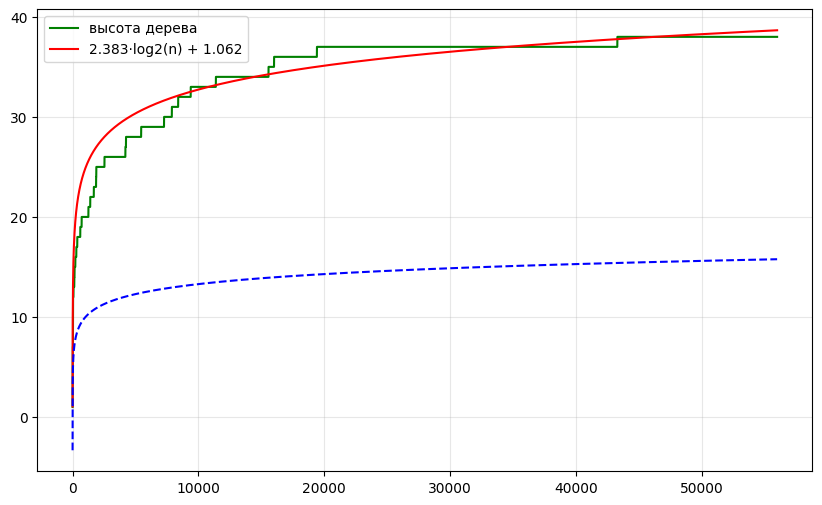

In [58]:
n, h = np.loadtxt('Debug x64\\stat_BST.txt', unpack=True)
print('Статистика по несбалансированному дереву со случайными значениями')

y = h
x = np.log2(n)

plt.figure(figsize=(10, 6))
plt.plot(n, h, 'green', label='высота дерева')

a,b = symbols('a,b')
MSE = 1/3*((a*x[0]+b-y[0])**2 + (a*x[x.size//2]+b-y[y.size//2])**2 + (a*x[-1]+b-y[-1])**2)
MSE_1,MSE_2 = diff(MSE,a),diff(MSE,b)
step = 0.001
v1,v2 = 1,1

print(f"Начальный MSE: {MSE.subs({a:v1,b:v2}):.6f}")

for j in range (20):
        actual = MSE.subs({a:v1,b:v2})
        v1 -= MSE_1.subs({a:v1,b:v2}) * step
        v2 -= MSE_2.subs({a:v1,b:v2}) * step

func = v1 * x + v2
print(f"MSE = {MSE.subs({a:v1,b:v2}):.6f}")
plt.plot(n, func, 'red', label=f'{v1:.3f}·log2(n) + {v2:.3f}')

x = np.linspace(0.1, 56000, 56000)
y = np.log2(x)
plt.plot(x, y, 'b--')

plt.legend()
plt.grid(True, alpha=0.3)

Статистика по АВЛ-дереву со случайными значениями
Начальный MSE: 3.305863
MSE = 0.003531


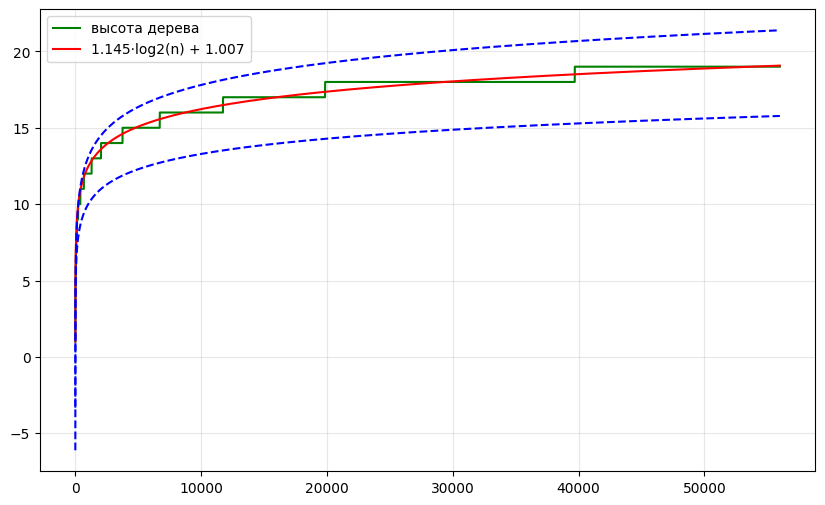

In [59]:
n, h = np.loadtxt('Debug x64\\stat_AVL.txt', unpack=True)
print('Статистика по АВЛ-дереву со случайными значениями')

y = h
x = np.log2(n)

plt.figure(figsize=(10, 6))
plt.plot(n, h, 'green', label='высота дерева')

a,b = symbols('a,b')
MSE = 1/3*((a*x[0]+b-y[0])**2 + (a*x[x.size//2]+b-y[y.size//2])**2 + (a*x[-1]+b-y[-1])**2)
MSE_1,MSE_2 = diff(MSE,a),diff(MSE,b)
step = 0.001
v1,v2 = 1,1

print(f"Начальный MSE: {MSE.subs({a:v1,b:v2}):.6f}")

for j in range (20):
        actual = MSE.subs({a:v1,b:v2})
        v1 -= MSE_1.subs({a:v1,b:v2}) * step
        v2 -= MSE_2.subs({a:v1,b:v2}) * step

func = v1 * x + v2
print(f"MSE = {MSE.subs({a:v1,b:v2}):.6f}")
plt.plot(n, func, 'red', label=f'{v1:.3f}·log2(n) + {v2:.3f}')

x = np.linspace(0.1, 56000, 56000)
y = np.log2(x)
plt.plot(x, y, 'b--')
y = 1.44*np.log2(x)-1.33
plt.plot(x, y, 'b--')

plt.legend()
plt.grid(True, alpha=0.3)

Статистика по АВЛ-дереву с монотонно увеличивающимися значениями
Начальный MSE: 0.398523
MSE = 0.000427


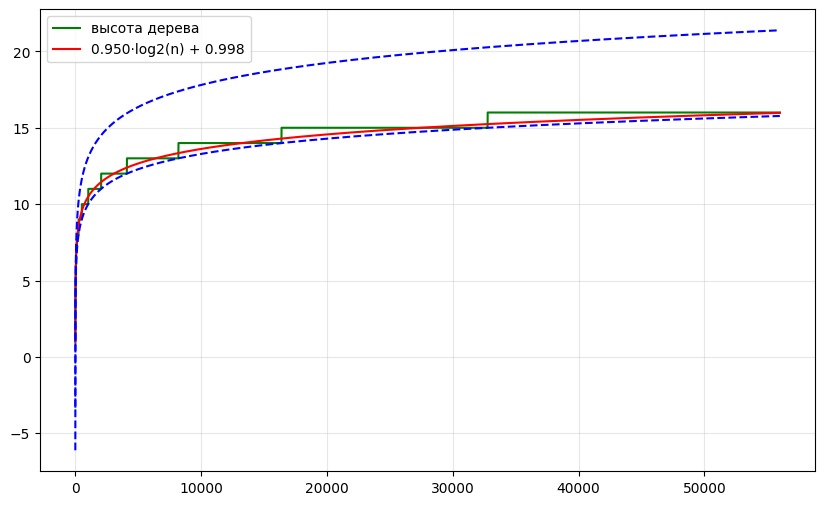

In [60]:
n, h = np.loadtxt('Debug x64\\stat_AVL_monoton.txt', unpack=True)
print('Статистика по АВЛ-дереву с монотонно увеличивающимися значениями')

y = h
x = np.log2(n)

plt.figure(figsize=(10, 6))
plt.plot(n, h, 'green', label='высота дерева')

a,b = symbols('a,b')
MSE = 1/3*((a*x[0]+b-y[0])**2 + (a*x[x.size//2]+b-y[y.size//2])**2 + (a*x[-1]+b-y[-1])**2)
MSE_1,MSE_2 = diff(MSE,a),diff(MSE,b)
step = 0.001
v1,v2 = 1,1

print(f"Начальный MSE: {MSE.subs({a:v1,b:v2}):.6f}")

for j in range (20):
        actual = MSE.subs({a:v1,b:v2})
        v1 -= MSE_1.subs({a:v1,b:v2}) * step
        v2 -= MSE_2.subs({a:v1,b:v2}) * step

func = v1 * x + v2
print(f"MSE = {MSE.subs({a:v1,b:v2}):.6f}")
plt.plot(n, func, 'red', label=f'{v1:.3f}·log2(n) + {v2:.3f}')

x = np.linspace(0.1, 56000, 56000)
y = np.log2(x)
plt.plot(x, y, 'b--')
y = 1.44*np.log2(x)-1.33
plt.plot(x, y, 'b--')

plt.legend()
plt.grid(True, alpha=0.3)

Статистика по красно-чёрному дереву со случайными значениями
Начальный MSE: 15.395330
MSE = 0.395581


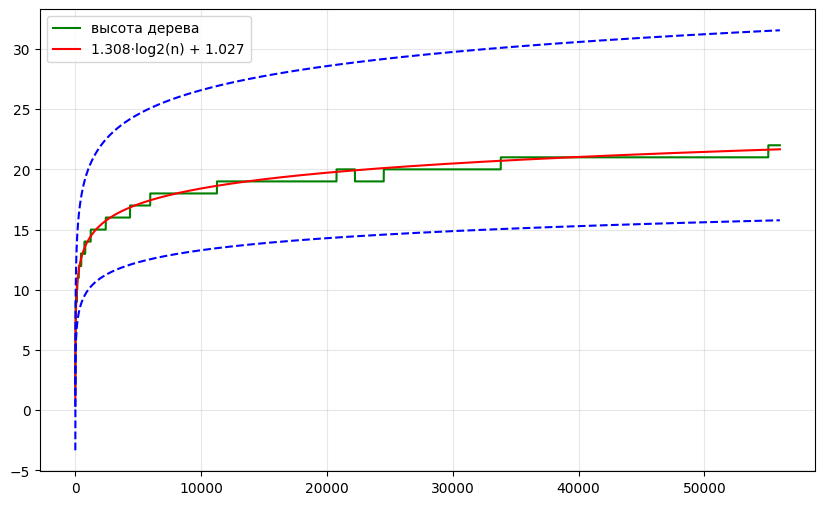

In [61]:
n, h = np.loadtxt('Debug x64\\stat_RNB.txt', unpack=True)
print('Статистика по красно-чёрному дереву со случайными значениями')

y = h
x = np.log2(n)

plt.figure(figsize=(10, 6))
plt.plot(n, h, 'green', label='высота дерева')

a,b = symbols('a,b')
MSE = 1/3*((a*x[0]+b-y[0])**2 + (a*x[x.size//2]+b-y[y.size//2])**2 + (a*x[-1]+b-y[-1])**2)
MSE_1,MSE_2 = diff(MSE,a),diff(MSE,b)
step = 0.001
v1,v2 = 1,1

print(f"Начальный MSE: {MSE.subs({a:v1,b:v2}):.6f}")

for j in range (20):
        actual = MSE.subs({a:v1,b:v2})
        v1 -= MSE_1.subs({a:v1,b:v2}) * step
        v2 -= MSE_2.subs({a:v1,b:v2}) * step

func = v1 * x + v2
print(f"MSE = {MSE.subs({a:v1,b:v2}):.6f}")
plt.plot(n, func, 'red', label=f'{v1:.3f}·log2(n) + {v2:.3f}')

x = np.linspace(0.1, 56000, 56000)
y = np.log2(x)
plt.plot(x, y, 'b--')
y = 2*np.log2(x+1)
plt.plot(x, y, 'b--')

plt.legend()
plt.grid(True, alpha=0.3)

Статистика по красно-чёрному дереву с монотонно увеличивающимися значениями
Начальный MSE: 126.117350
MSE = 0.300745


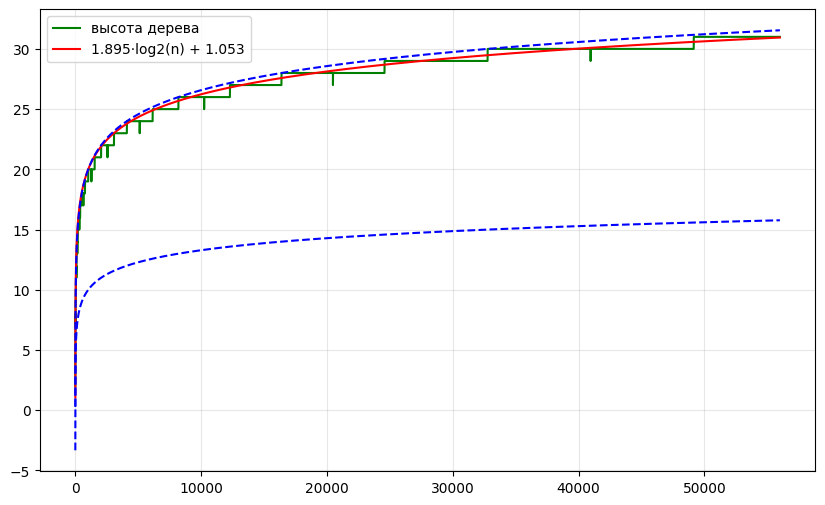

In [62]:
n, h = np.loadtxt('Debug x64\\stat_RNB_monoton.txt', unpack=True)
print('Статистика по красно-чёрному дереву с монотонно увеличивающимися значениями')

y = h
x = np.log2(n)

plt.figure(figsize=(10, 6))
plt.plot(n, h, 'green', label='высота дерева')

a,b = symbols('a,b')
MSE = 1/3*((a*x[0]+b-y[0])**2 + (a*x[x.size//2]+b-y[y.size//2])**2 + (a*x[-1]+b-y[-1])**2)
MSE_1,MSE_2 = diff(MSE,a),diff(MSE,b)
step = 0.001
v1,v2 = 1,1

print(f"Начальный MSE: {MSE.subs({a:v1,b:v2}):.6f}")

for j in range (20):
        actual = MSE.subs({a:v1,b:v2})
        v1 -= MSE_1.subs({a:v1,b:v2}) * step
        v2 -= MSE_2.subs({a:v1,b:v2}) * step

func = v1 * x + v2
print(f"MSE = {MSE.subs({a:v1,b:v2}):.6f}")
plt.plot(n, func, 'red', label=f'{v1:.3f}·log2(n) + {v2:.3f}')

x = np.linspace(0.1, 56000, 56000)
y = np.log2(x)
plt.plot(x, y, 'b--')
y = 2*np.log2(x+1)
plt.plot(x, y, 'b--')

plt.legend()
plt.grid(True, alpha=0.3)